# Linear Regression Assignment Car Price Prediction

## Problem Statement: Which variables are significant in predicting the price of a car & how well those variables describe the price of a car 

In [991]:
#Importing libaries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# Import & Understanding of data

In [992]:
#Read data from dataset
carinfo = pd.read_csv("CarPrice_Assignment.csv")

In [993]:
#sample values from the dataframe
carinfo.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [994]:
#structure of the dataframe
carinfo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
car_ID              205 non-null int64
symboling           205 non-null int64
CarName             205 non-null object
fueltype            205 non-null object
aspiration          205 non-null object
doornumber          205 non-null object
carbody             205 non-null object
drivewheel          205 non-null object
enginelocation      205 non-null object
wheelbase           205 non-null float64
carlength           205 non-null float64
carwidth            205 non-null float64
carheight           205 non-null float64
curbweight          205 non-null int64
enginetype          205 non-null object
cylindernumber      205 non-null object
enginesize          205 non-null int64
fuelsystem          205 non-null object
boreratio           205 non-null float64
stroke              205 non-null float64
compressionratio    205 non-null float64
horsepower          205 non-null int64
peakrpm      

# Data preparation

In [995]:
#check rows and columns
carinfo.shape

(205, 26)

In [996]:
#drop car_id since it is a unique column and has no added value
carinfo = carinfo.drop('car_ID', axis=1)

In [997]:
#check rows and columns
carinfo.shape

(205, 25)

In [998]:
# Extraction of company name
# Replacing - with " " - splitting it and taking only the first item which is the manufacturer
# This column will be the manufacturer's name
carinfo['CarMfg'] = carinfo['CarName'].str.replace('-',' ').str.split(' ').str[0]

In [999]:
#checking sample company values
carinfo['CarMfg']

0            alfa
1            alfa
2            alfa
3            audi
4            audi
5            audi
6            audi
7            audi
8            audi
9            audi
10            bmw
11            bmw
12            bmw
13            bmw
14            bmw
15            bmw
16            bmw
17            bmw
18      chevrolet
19      chevrolet
20      chevrolet
21          dodge
22          dodge
23          dodge
24          dodge
25          dodge
26          dodge
27          dodge
28          dodge
29          dodge
          ...    
175        toyota
176        toyota
177        toyota
178        toyota
179        toyota
180        toyota
181       toyouta
182     vokswagen
183    volkswagen
184    volkswagen
185    volkswagen
186    volkswagen
187    volkswagen
188    volkswagen
189            vw
190            vw
191    volkswagen
192    volkswagen
193    volkswagen
194         volvo
195         volvo
196         volvo
197         volvo
198         volvo
199       

In [1000]:
#drop original redundant column since the information from this column is of no use
carinfo = carinfo.drop('CarName',axis=1)

In [1001]:
#checking shape after dropping this column
carinfo.shape

(205, 25)

In [1002]:
#checking the columns - there are categorical and numerical columns here
carinfo.columns

Index(['symboling', 'fueltype', 'aspiration', 'doornumber', 'carbody',
       'drivewheel', 'enginelocation', 'wheelbase', 'carlength', 'carwidth',
       'carheight', 'curbweight', 'enginetype', 'cylindernumber', 'enginesize',
       'fuelsystem', 'boreratio', 'stroke', 'compressionratio', 'horsepower',
       'peakrpm', 'citympg', 'highwaympg', 'price', 'CarMfg'],
      dtype='object')

In [1003]:
#checking invalid or repeated values
carinfo['CarMfg'].unique()

array(['alfa', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda', 'isuzu',
       'jaguar', 'maxda', 'mazda', 'buick', 'mercury', 'mitsubishi',
       'Nissan', 'nissan', 'peugeot', 'plymouth', 'porsche', 'porcshce',
       'renault', 'saab', 'subaru', 'toyota', 'toyouta', 'vokswagen',
       'volkswagen', 'vw', 'volvo'], dtype=object)

Here there are many manufacturers which are mispelt - need to regularize/standardize them

In [1004]:
#converting all car names to lower before transformation of duplicate values
carinfo['CarMfg'] = carinfo['CarMfg'].str.lower()

In [1005]:
# trying to decode the manufacturers with spelling mistakes
carinfo['CarMfg'].value_counts()

toyota        31
nissan        18
mazda         15
mitsubishi    13
honda         13
subaru        12
peugeot       11
volvo         11
volkswagen     9
dodge          9
bmw            8
buick          8
audi           7
plymouth       7
saab           6
porsche        4
isuzu          4
chevrolet      3
alfa           3
jaguar         3
vw             2
maxda          2
renault        2
vokswagen      1
mercury        1
porcshce       1
toyouta        1
Name: CarMfg, dtype: int64

In [1006]:
#checking unique values again
carinfo['CarMfg'].unique()

array(['alfa', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda', 'isuzu',
       'jaguar', 'maxda', 'mazda', 'buick', 'mercury', 'mitsubishi',
       'nissan', 'peugeot', 'plymouth', 'porsche', 'porcshce', 'renault',
       'saab', 'subaru', 'toyota', 'toyouta', 'vokswagen', 'volkswagen',
       'vw', 'volvo'], dtype=object)

In [1007]:
#moving all redundant values to a single value
#standardizing the spellings for mazda/volkswagen/porsche,toyota
carinfo['CarMfg'] = carinfo['CarMfg'].str.replace('maxda','mazda')
carinfo['CarMfg'] = carinfo['CarMfg'].str.replace('vw','volkswagen')
carinfo['CarMfg'] = carinfo['CarMfg'].str.replace('porcshce','porsche')
carinfo['CarMfg'] = carinfo['CarMfg'].str.replace('toyouta','toyota')
carinfo['CarMfg'] = carinfo['CarMfg'].str.replace('vokswagen','volkswagen')

In [1008]:
#now all values are unique
# no duplicates exist now with different spellings
carinfo['CarMfg'].unique()

array(['alfa', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda', 'isuzu',
       'jaguar', 'mazda', 'buick', 'mercury', 'mitsubishi', 'nissan',
       'peugeot', 'plymouth', 'porsche', 'renault', 'saab', 'subaru',
       'toyota', 'volkswagen', 'volvo'], dtype=object)

# Sanity Checks

In [1009]:
#check null values
# There are no null values hence no treatment is required
carinfo.isnull().sum()*100/len(carinfo.index)

symboling           0.0
fueltype            0.0
aspiration          0.0
doornumber          0.0
carbody             0.0
drivewheel          0.0
enginelocation      0.0
wheelbase           0.0
carlength           0.0
carwidth            0.0
carheight           0.0
curbweight          0.0
enginetype          0.0
cylindernumber      0.0
enginesize          0.0
fuelsystem          0.0
boreratio           0.0
stroke              0.0
compressionratio    0.0
horsepower          0.0
peakrpm             0.0
citympg             0.0
highwaympg          0.0
price               0.0
CarMfg              0.0
dtype: float64

In [1010]:
#check the numerical columns
carinfo.describe()

,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571
std,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332
min,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000
max,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


In [1011]:
#Converting symboling to categorical columns
carinfo['symboling'] = carinfo['symboling'].astype(str)

In [1012]:
#again check the numerical columns
carinfo.describe()

,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571
std,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332
min,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000
max,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


In [1013]:
#capturing the numerical columns in the dataset
num_vars = ['int16','int32','int64','float16','float32','float64']
carinfo_num = carinfo.select_dtypes(include=num_vars)
carinfo_num.columns

Index(['wheelbase', 'carlength', 'carwidth', 'carheight', 'curbweight',
       'enginesize', 'boreratio', 'stroke', 'compressionratio', 'horsepower',
       'peakrpm', 'citympg', 'highwaympg', 'price'],
      dtype='object')

In [1014]:
#check duplicates
carinfo = carinfo.drop_duplicates()

In [1015]:
#check for shape
# no duplicates hence no rows dropped
carinfo.shape

(205, 25)

# Univariate analysis of continuous variables using seaborn distplot and boxplot

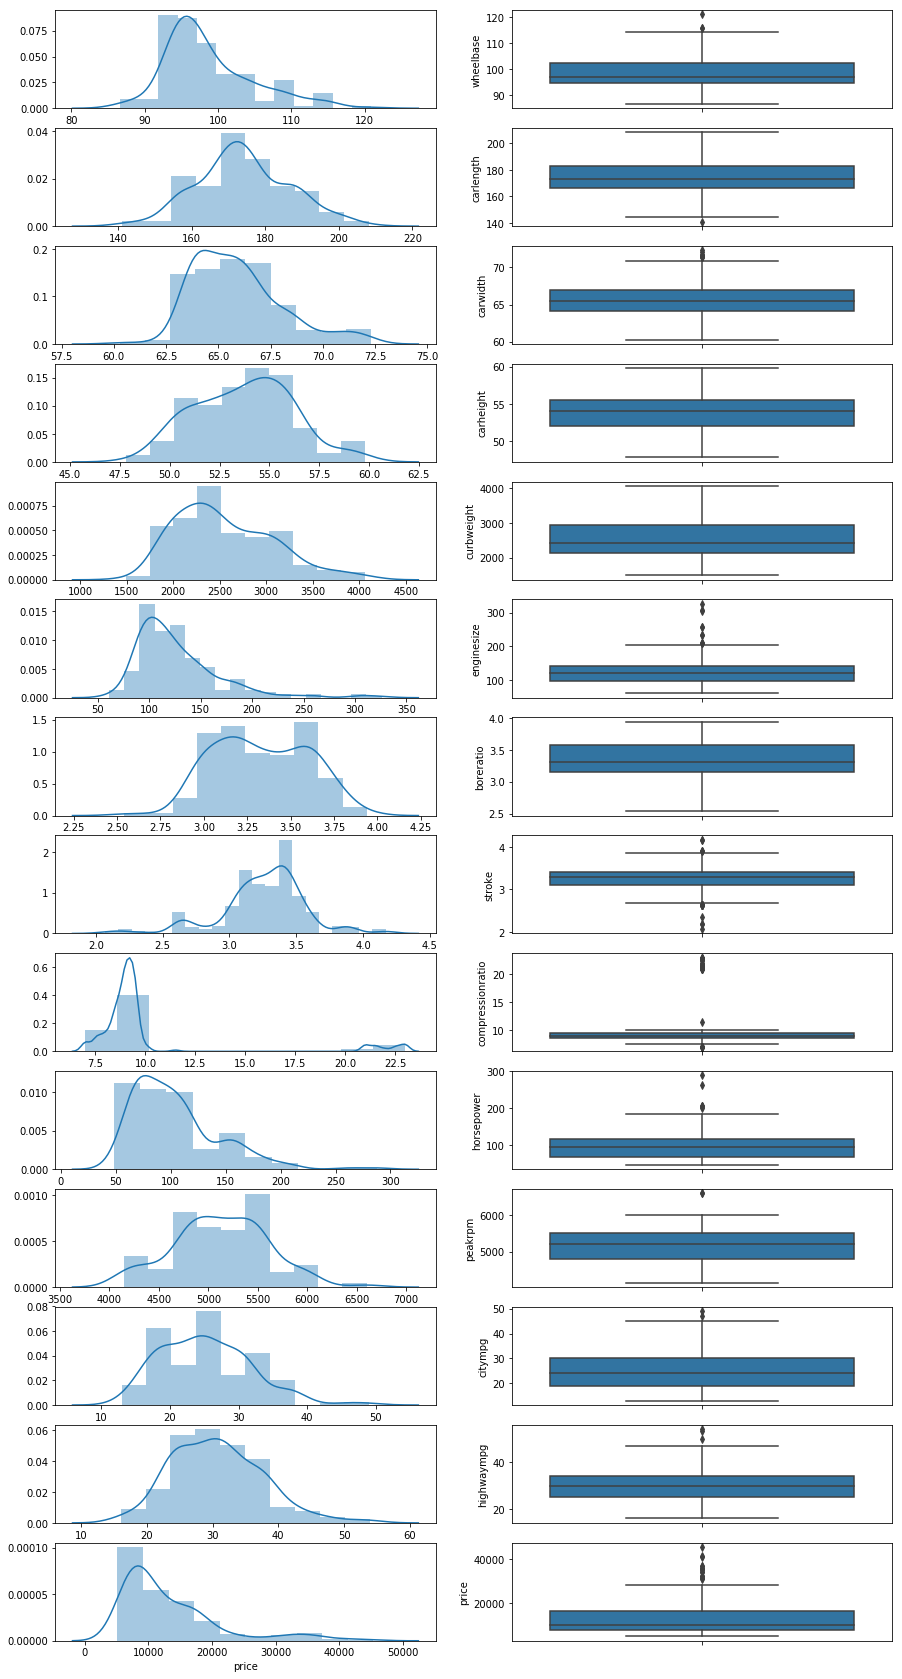

In [1016]:
#Symboling is discrete - ignoring it for distribution and boxplotting
#Plotting pure continuous variables
plt.figure(figsize=(15, 30))
plt.subplot(14,2,1)
sns.distplot(carinfo.wheelbase)
plt.subplot(14,2,2)
sns.boxplot(carinfo.wheelbase,orient='v')
plt.subplot(14,2,3)
sns.distplot(carinfo.carlength,bins=10)
plt.subplot(14,2,4)
sns.boxplot(carinfo.carlength,orient='v')
plt.subplot(14,2,5)
sns.distplot(carinfo.carwidth,bins=10)
plt.subplot(14,2,6)
sns.boxplot(carinfo.carwidth,orient='v')
plt.subplot(14,2,7)
sns.distplot(carinfo.carheight,bins=10)
plt.subplot(14,2,8)
sns.boxplot(carinfo.carheight,orient='v')
plt.subplot(14,2,9)
sns.distplot(carinfo.curbweight,bins=10)
plt.subplot(14,2,10)
sns.boxplot(carinfo.curbweight,orient='v')
plt.subplot(14,2,11)
sns.distplot(carinfo.enginesize)
plt.subplot(14,2,12)
sns.boxplot(carinfo.enginesize,orient='v')
plt.subplot(14,2,13)
sns.distplot(carinfo.boreratio)
plt.subplot(14,2,14)
sns.boxplot(carinfo.boreratio,orient='v')
plt.subplot(14,2,15)
sns.distplot(carinfo.stroke)
plt.subplot(14,2,16)
sns.boxplot(carinfo.stroke,orient='v')
plt.subplot(14,2,17)
sns.distplot(carinfo.compressionratio,bins=10)
plt.subplot(14,2,18)
sns.boxplot(carinfo.compressionratio,orient='v')
plt.subplot(14,2,19)
sns.distplot(carinfo.horsepower,bins=10)
plt.subplot(14,2,20)
sns.boxplot(carinfo.horsepower,orient='v')
plt.subplot(14,2,21)
sns.distplot(carinfo.peakrpm,bins=10)
plt.subplot(14,2,22)
sns.boxplot(carinfo.peakrpm,orient='v')
plt.subplot(14,2,23)
sns.distplot(carinfo.citympg,bins=10)
plt.subplot(14,2,24)
sns.boxplot(carinfo.citympg,orient='v')
plt.subplot(14,2,25)
sns.distplot(carinfo.highwaympg,bins=10)
plt.subplot(14,2,26)
sns.boxplot(carinfo.highwaympg,orient='v')
plt.subplot(14,2,27)
sns.distplot(carinfo.price,bins=10)
plt.subplot(14,2,28)
sns.boxplot(carinfo.price,orient='v')
plt.show()

## Inferences: 

1. wheelbase is distributed around 85 to 115 and there are outliers at the top
2. carlength is distributed around 140 to 210 and there are outliers at the bottom end
3. carwidth is distributed around 60 to 72.5 and there are outliers at the top end
4. carheight is distributed around 47.5 to 60 and there are no outliers
5. curbweight is distributed around 1500 to 4000 and there are no outliers
6. enginesize is distributed around 60 to 240 and there are outliers at the top end
7. boreratio is distributed around 2.55 to 3.85 and there are no outliers
8. stroke is distributed around 2.5 to 3.75 and there are outliers at the both ends
9. compressionratio is distributed around 7.5 to 10 and there are huge outliers at the top end
10. horsepower is distributed around 50 to 220 and there are outliers at the both ends
11. peakrpm is closer to being normally distributed with no outliers
12. citympg is closer to being normally distributed with top-end outliers
13. highwaympg is closer to being normally distributed with top-end outliers
14. price is distributed around 5000 to 40000 and there are outliers at the top end
15. All parameters except peakrpm,citympg and highwaympg are right skewed

# Univariate analysis of categorical variables using seaborn countplots

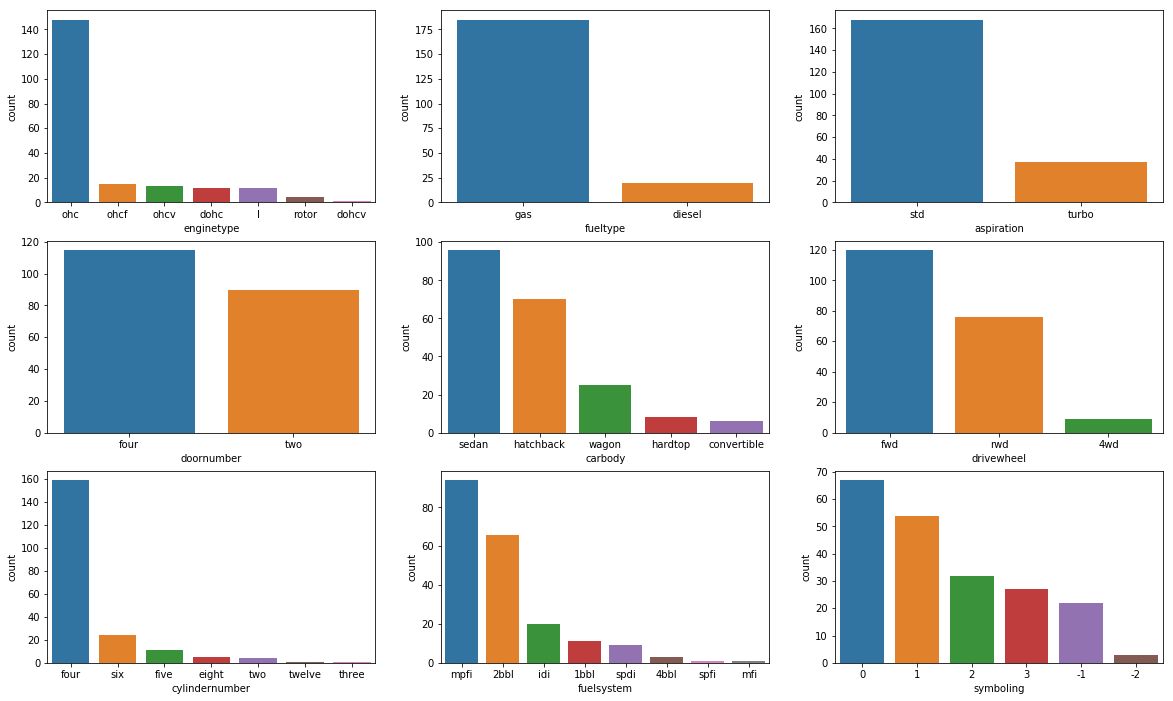

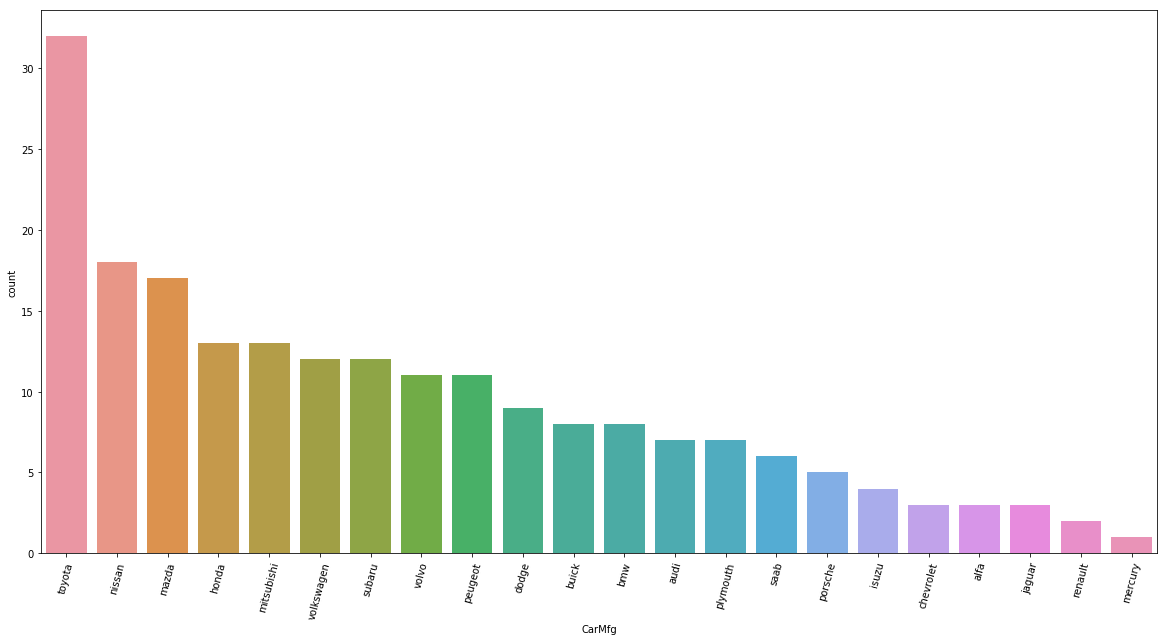

In [1017]:
#Plotting Categorical variables for Univariate Analysis
# We will use countplot to analyse the categorical variables
plt.figure(figsize=(20, 12))
plt.subplot(3,3,1)
sns.countplot(carinfo.enginetype, order = carinfo.enginetype.value_counts().index);
plt.subplot(3,3,2)
sns.countplot(carinfo.fueltype, order = carinfo.fueltype.value_counts().index);
plt.subplot(3,3,3)
sns.countplot(carinfo.aspiration, order = carinfo.aspiration.value_counts().index)
plt.subplot(3,3,4)
sns.countplot(carinfo.doornumber, order = carinfo.doornumber.value_counts().index)
plt.subplot(3,3,5)
sns.countplot(carinfo.carbody, order = carinfo.carbody.value_counts().index)
plt.subplot(3,3,6)
sns.countplot(carinfo.drivewheel, order = carinfo.drivewheel.value_counts().index)
plt.subplot(3,3,7)
sns.countplot(carinfo.cylindernumber, order = carinfo.cylindernumber.value_counts().index)
plt.subplot(3,3,8)
sns.countplot(carinfo.fuelsystem, order = carinfo.fuelsystem.value_counts().index)
plt.subplot(3,3,9)
sns.countplot(carinfo.symboling, order = carinfo.symboling.value_counts().index);
plt.show()
plt.figure(figsize=(20, 10))
sns.countplot(carinfo.CarMfg, order = carinfo.CarMfg.value_counts().index);
plt.xticks(rotation=75)
plt.show()

### Inferences
1. amongst the engine types, ohc is the most popular followed by ohcf and ohcv least being dohcv
2. amongst the fuel types, gas is the most popular fuel followed by diesel
3. amongst the aspiration, std is the most popular followed by turbo
4. amongst the door number types, 4 door is the most populated followed by 2 door coupes
5. amongst the car body, sedan is the most popular followed by hathback least being convertibles
6. amongst the drivewheel, fwd is the most popular followed by rwd, and 4wd
7. amongst the cylinder numbers, 4 cyclinders are predominant followed by 6 cylinders
8. amongst the fuel system, mpfi is most popular
9. amongst the symboling, 0 symbol is the most popular in the market
10. amongst the brands, toyota is the most favourable brand followed by nissan and mazda - least being mercury

# Derived variables

In [1018]:
#Stroke Ratio: Stroke Ratio is defined as the ratio between cylinder bore diameter and piston stroke.
carinfo['strk_ratio']=(carinfo['stroke']/carinfo['boreratio'])

#Car Size or volume 
carinfo['size']=carinfo['carlength']*carinfo['carwidth']*carinfo['carheight']

# Bivariate analysis of continuous variables using pyplot scatter function

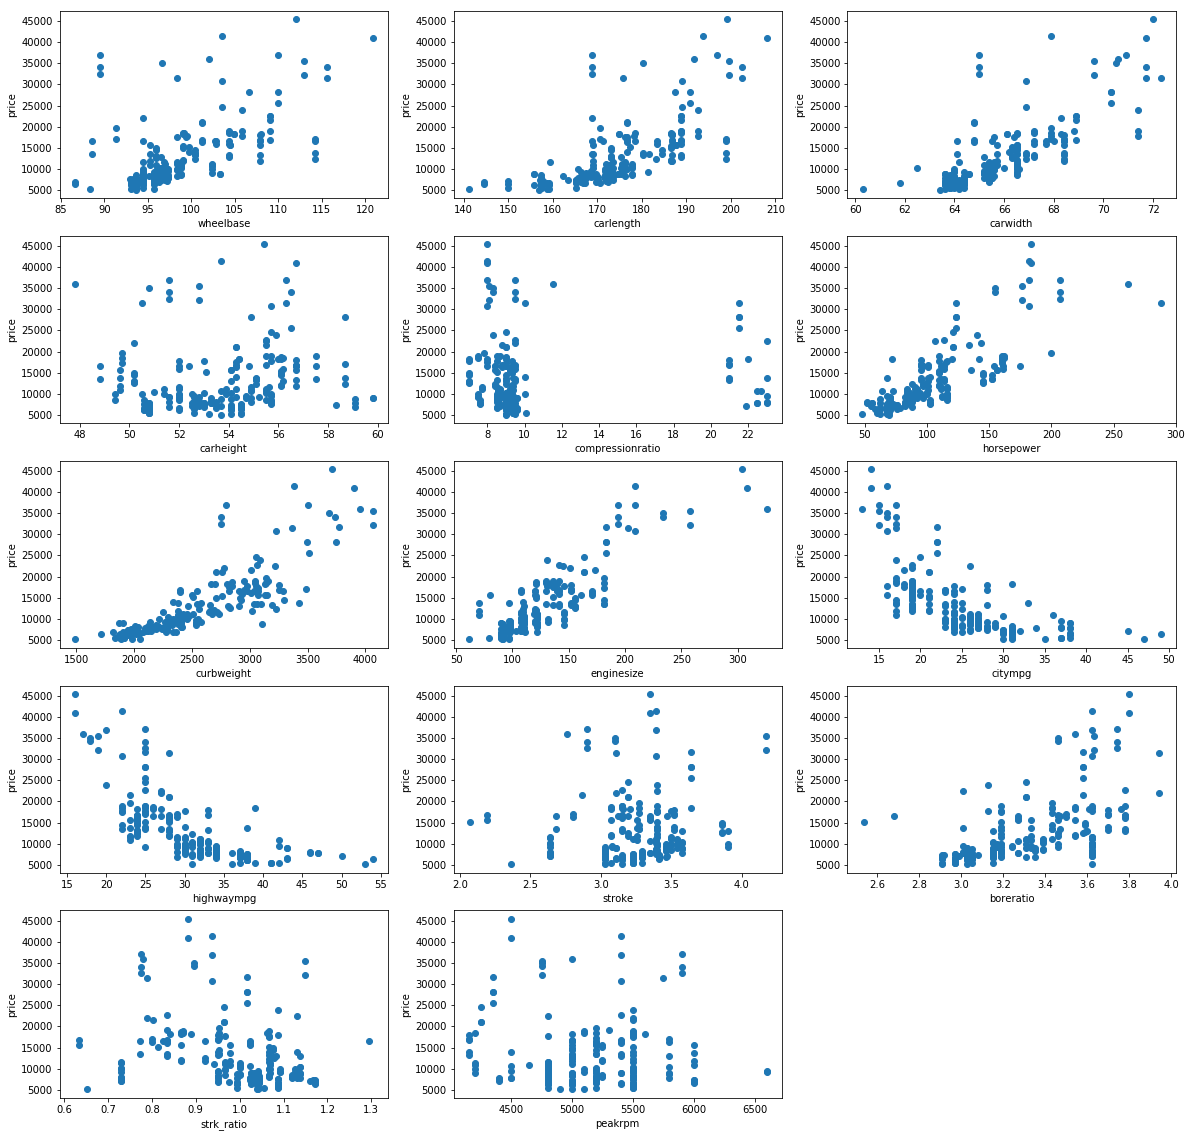

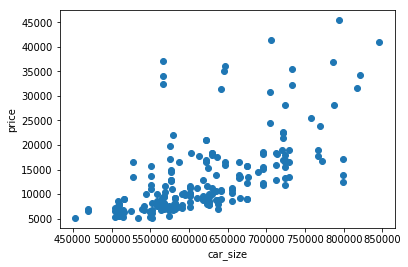

In [1019]:
#Defining function to plot the Continuous variables to plot a scatter for variable vs price
def bivariate(data,col):
    plt.scatter(x=data[col],y=data.price)
    plt.xlabel(col)
    plt.ylabel('price')
plt.figure(figsize=(20, 20))
plt.subplot(5,3,1)
bivariate(carinfo,'wheelbase')
plt.subplot(5,3,2)
bivariate(carinfo,'carlength')
plt.subplot(5,3,3)
bivariate(carinfo,'carwidth')
plt.subplot(5,3,4)
bivariate(carinfo,'carheight')
plt.subplot(5,3,5)
bivariate(carinfo,'compressionratio')
plt.subplot(5,3,6)
bivariate(carinfo,'horsepower')
plt.subplot(5,3,7)
bivariate(carinfo,'curbweight')
plt.subplot(5,3,8)
bivariate(carinfo,'enginesize')
plt.subplot(5,3,9)
bivariate(carinfo,'citympg')
plt.subplot(5,3,10)
bivariate(carinfo,'highwaympg')
plt.subplot(5,3,11)
bivariate(carinfo,'stroke')
plt.subplot(5,3,12)
bivariate(carinfo,'boreratio')
plt.subplot(5,3,13)
bivariate(carinfo,'strk_ratio')
plt.subplot(5,3,14)
bivariate(carinfo,'peakrpm')
plt.show()
plt.scatter(x=carinfo['size'],y=carinfo['price'])
plt.xlabel('car_size')
plt.ylabel('price')
plt.show()

### Inferences:

1. wheelbase,carlength,carwidth,curbweight are positively correlated with the price
2. horsepower and bore ratio have the highest correlation
3. citympg,highwaympg are negatively correlated
4. Car size is also showing the incline with the price

# Binning of continuous variables

In [1020]:
#Binning the car size
bins = [0,600000,750000,900000]
carsizeinfo_bin=['Small','Medium','Large']
carinfo['carsize'] = pd.cut(carinfo['size'],bins,right=False,labels=carsizeinfo_bin)

#Binning the engine size
bins = [0,100,200,400]
engineinfo_bin=['Small','Medium','Large']
carinfo['engine'] = pd.cut(carinfo['enginesize'],bins,right=False,labels=engineinfo_bin)
#Display the first 5 rows of the updated dataframe
carinfo.head()

,symboling,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,...,horsepower,peakrpm,citympg,highwaympg,price,CarMfg,strk_ratio,size,carsize,engine
0,3,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,...,111,5000,21,27,13495.0,alfa,0.772334,528019.904,Small,Medium
1,3,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,...,111,5000,21,27,16500.0,alfa,0.772334,528019.904,Small,Medium
2,1,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,...,154,5000,19,26,16500.0,alfa,1.294776,587592.640,Small,Medium
3,2,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,...,102,5500,24,30,13950.0,audi,1.065831,634816.956,Medium,Medium
4,2,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,...,115,5500,18,22,17450.0,audi,1.065831,636734.832,Medium,Medium


# Correlation matrix of continuous variables

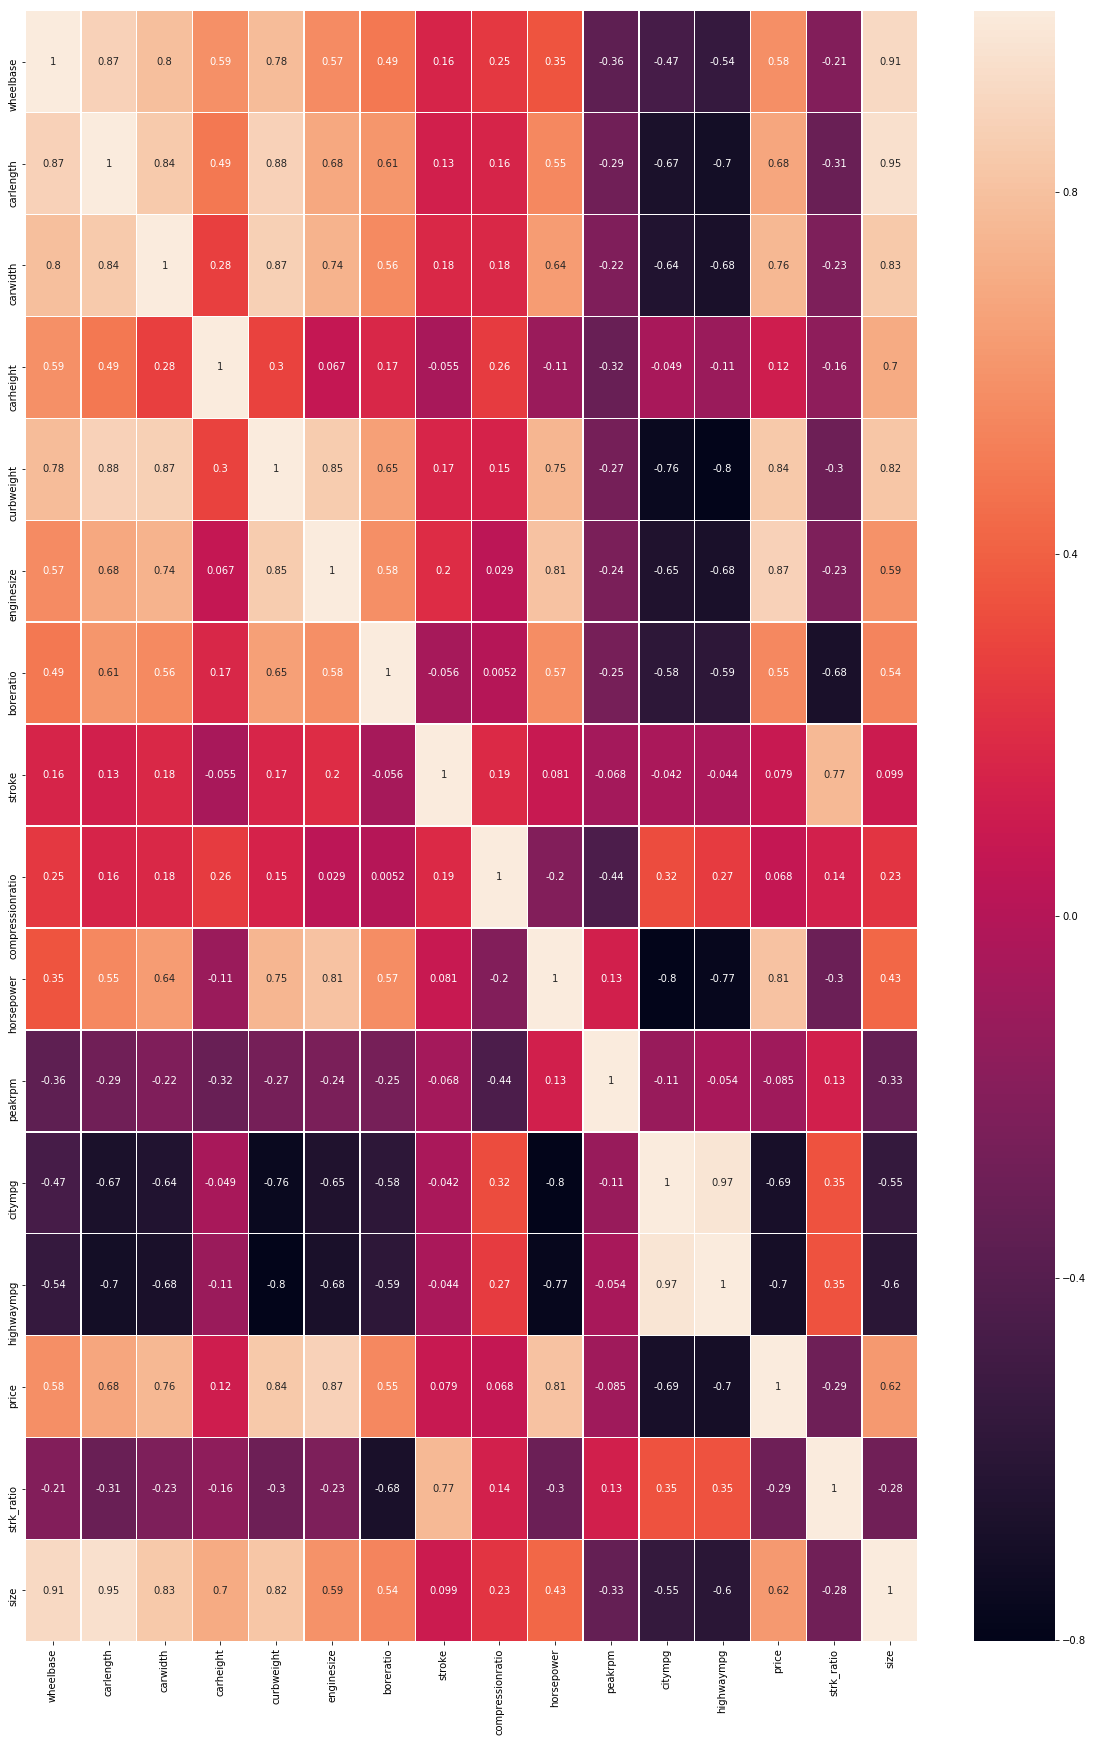

In [1021]:
#checking correlated parameters with price
fig, ax = plt.subplots(figsize=(20,30)) 
sns.heatmap(carinfo.corr(),annot=True,linewidths=.5, ax=ax)

### Inferences:
Price has the correlation in decreasing order with 
1. engine size
2. curbweight 
3. horsepower
4. carwidth
5. carlength 
6. overall size
7. wheelbase

Price had negative correlation with citympg and highway mpg and stroke ratio
Price had no correlation with stroke , compression ratio


# Scatter plots of positively correlated items

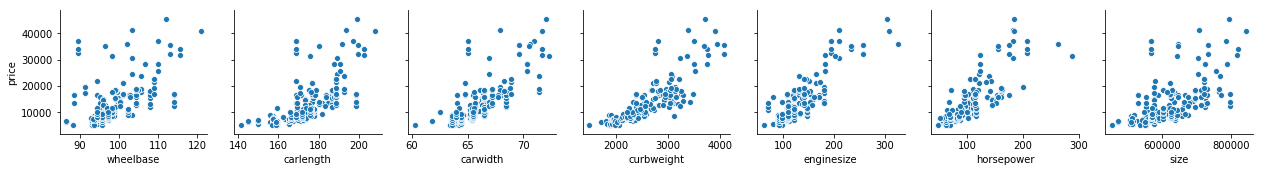

In [1022]:
#scatterplots for the positively correlated parameters
sns.pairplot(x_vars=['wheelbase','carlength','carwidth','curbweight','enginesize','horsepower','size'],y_vars='price',data=carinfo)
plt.show()

# Bivariate Analysis (Categorical Variables - set1)

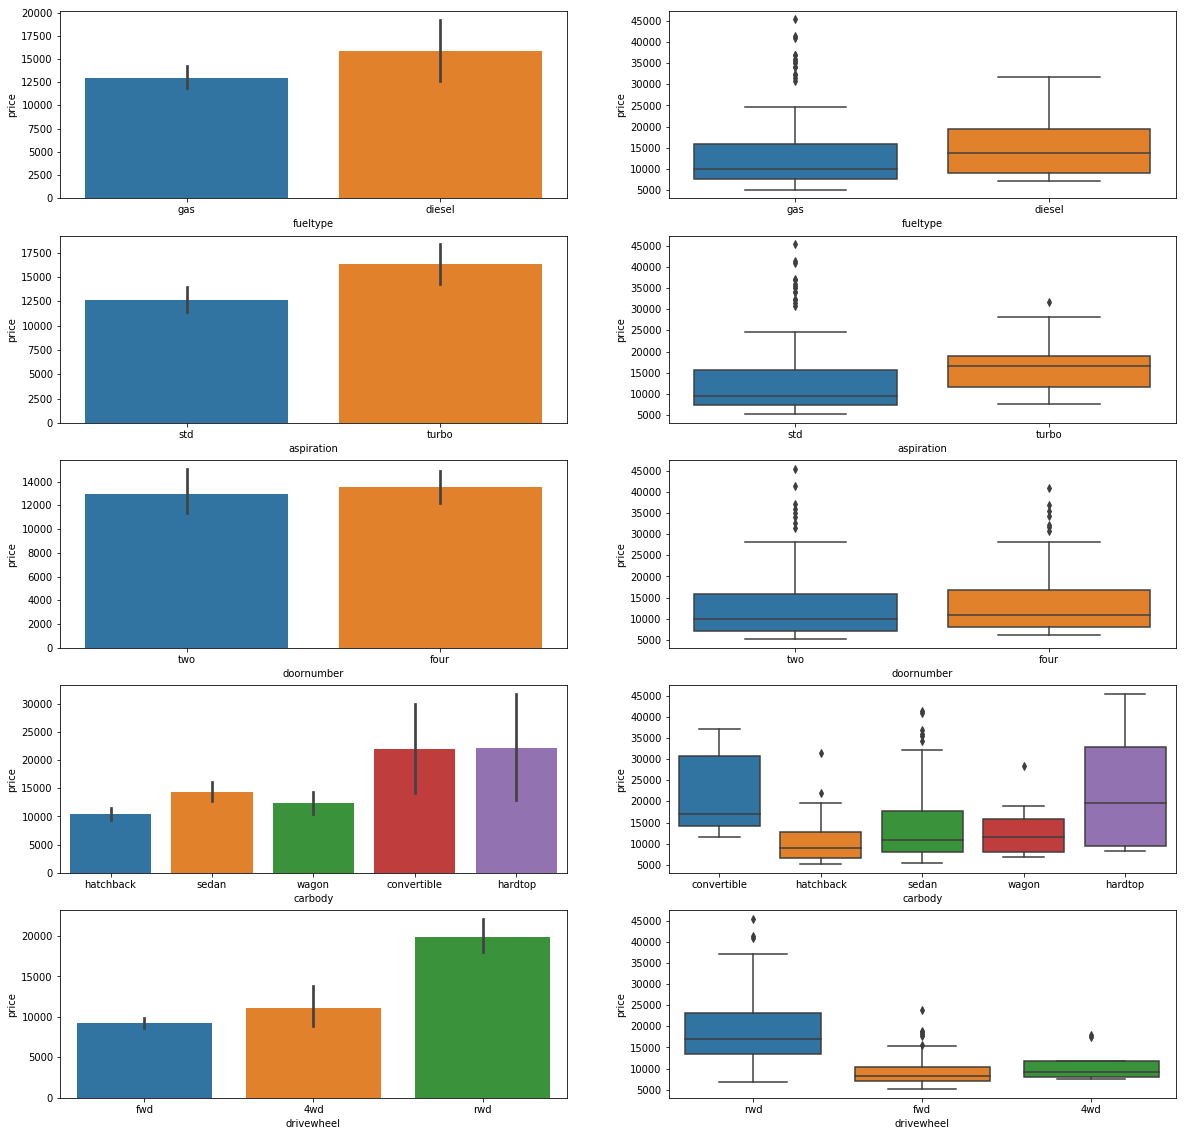

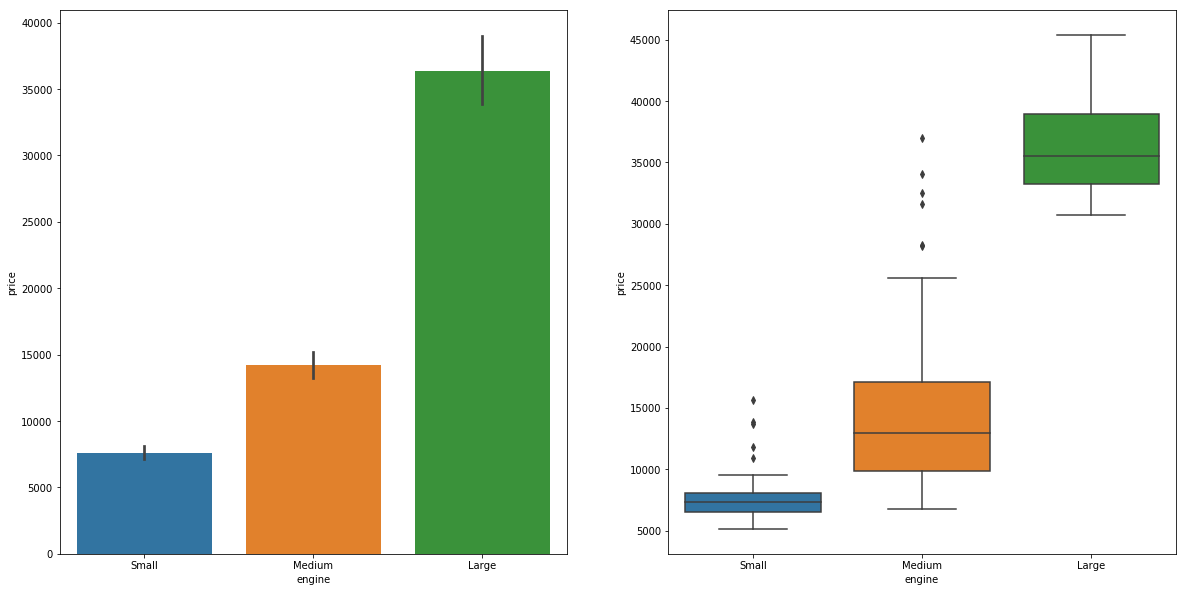

In [1023]:
#We will plot some of the categorical variables against price
#We will use boxplot to plot the Categorical variables against Price
# barplots with aggregate median price

#Function to plot the bivariate graphs
def bivariate_cat(data,col,grp):
    if grp==1:
        temp = data.groupby([col])['price'].aggregate(np.median).reset_index().sort_values('price')
        sns.barplot(x=data[col], y="price", data=data, order=temp[col])
    else:
        sns.boxplot(x = data[col], y = 'price', data = data)

#Variable Set 1
plt.figure(figsize=(20, 20))
plt.subplot(5,2,1)
bivariate_cat(carinfo,'fueltype',1)
plt.subplot(5,2,2)
bivariate_cat(carinfo,'fueltype',2)
plt.subplot(5,2,3)
bivariate_cat(carinfo,'aspiration',1)
plt.subplot(5,2,4)
bivariate_cat(carinfo,'aspiration',2)
plt.subplot(5,2,5)
bivariate_cat(carinfo,'doornumber',1)
plt.subplot(5,2,6)
bivariate_cat(carinfo,'doornumber',2)
plt.subplot(5,2,7)
bivariate_cat(carinfo,'carbody',1)
plt.subplot(5,2,8)
bivariate_cat(carinfo,'carbody',2)
plt.subplot(5,2,9)
bivariate_cat(carinfo,'drivewheel',1)
plt.subplot(5,2,10)
bivariate_cat(carinfo,'drivewheel',2)
plt.show()
plt.figure(figsize=(20, 10))
plt.subplot(1,2,1)
bivariate_cat(carinfo,'engine',1)
plt.subplot(1,2,2)
bivariate_cat(carinfo,'engine',2)
plt.show()

#### Inferences:
1. Amongst the fuel types - cars with diesel fuel have the highest prices while cars running on gas have high outliers
2. Amongst the aspiration - cars with turbo aspiration have the highest prices while cars running on std have high outliers
3. Amongst the door number types - cars with 2 and 4 doors have seemingly same prices however 2 doored cars have peak outliers
4. Amongst the carbody types - cars with hardtop have highest distribution while sedan has good number of outliers
5. Amongst the drive wheel types - cars with rwd have highest prices have peak outliers, fwd and 4wd have same range of prices
6. Amongst the engine size types - cars with large engine size have high prices

# Bivariate Analysis for Categorical Variables (Set 2)

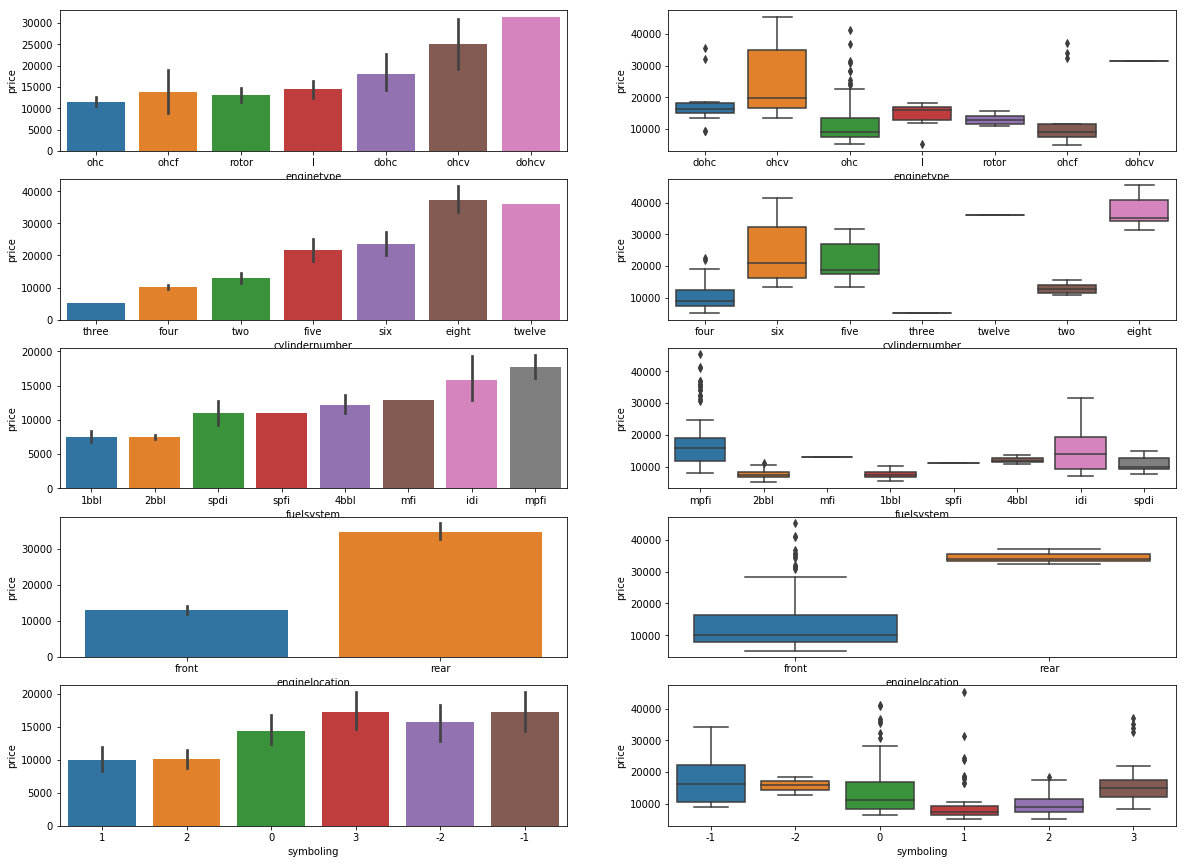

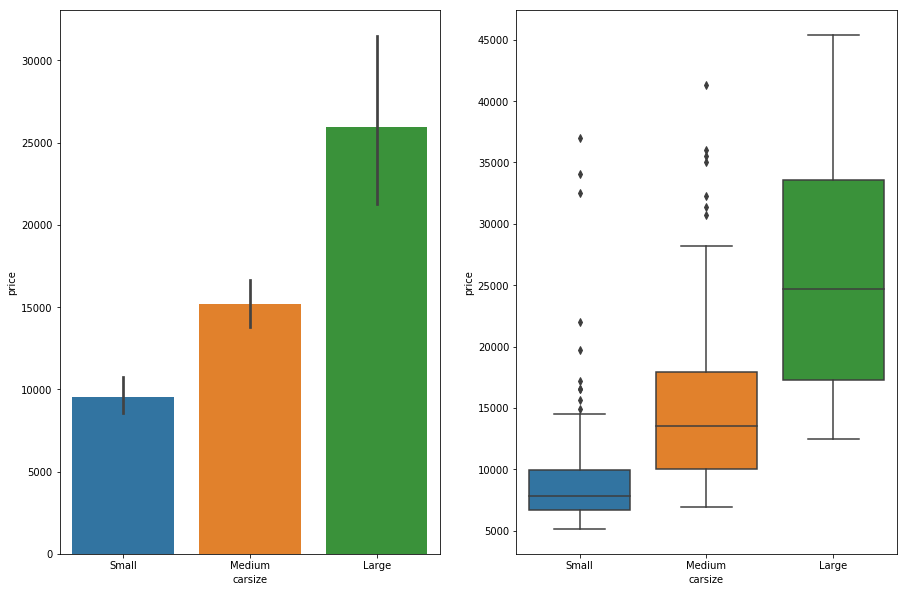

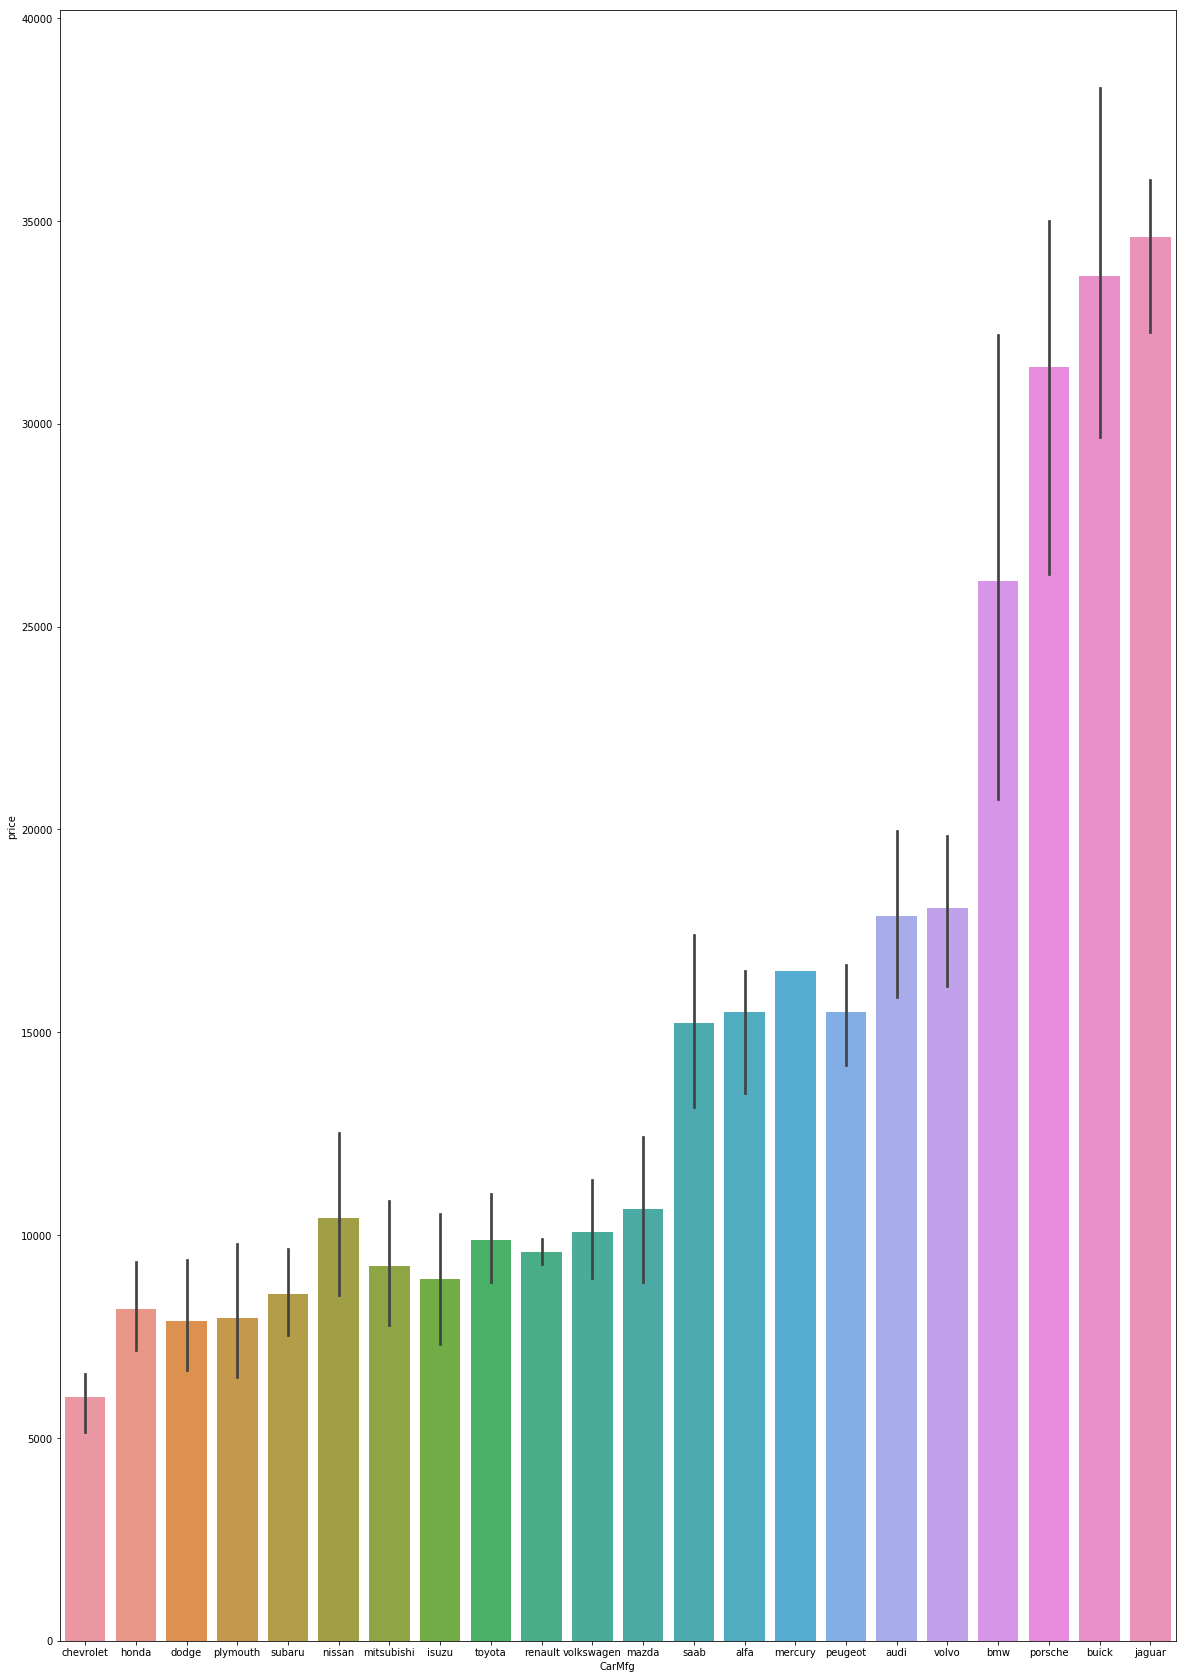

In [1024]:
plt.figure(figsize=(20, 15))
plt.subplot(5,2,1)
bivariate_cat(carinfo,'enginetype',1)
plt.subplot(5,2,2)
bivariate_cat(carinfo,'enginetype',2)
plt.subplot(5,2,3)
bivariate_cat(carinfo,'cylindernumber',1)
plt.subplot(5,2,4)
bivariate_cat(carinfo,'cylindernumber',2)
plt.subplot(5,2,5)
bivariate_cat(carinfo,'fuelsystem',1)
plt.subplot(5,2,6)
bivariate_cat(carinfo,'fuelsystem',2)
plt.subplot(5,2,7)
bivariate_cat(carinfo,'enginelocation',1)
plt.subplot(5,2,8)
bivariate_cat(carinfo,'enginelocation',2)
plt.subplot(5,2,9)
bivariate_cat(carinfo,'symboling',1)
plt.subplot(5,2,10)
bivariate_cat(carinfo,'symboling',2)
plt.show()
plt.figure(figsize=(15, 10))
plt.subplot(1,2,1)
bivariate_cat(carinfo,'carsize', 1)
plt.subplot(1,2,2)
bivariate_cat(carinfo,'carsize', 2)
plt.show()
plt.figure(figsize=(20,30))
bivariate_cat(carinfo,'CarMfg',1)
plt.show()

#### Inferences:
    
1. Amongst the engine types - cars with dohcv have highest median prices ohcv have highest spread
2. Amongst the cylinder number - cars with 8 cylinders have highest prices - 6 cylinders have highest spread
3. Amongst the fuel system - cars with mpfi have highest prices while idi highest spread
4. Amongst the engine system - cars with rear engine have highest prices while front engine was good spread
5. Amongst the symboling - cars with 3 symboling with highest price with 1 symboling have peak outliers
6. Amongst the manufacturers - jaguars have highest price while chevrolet has lowest price
7. Amongst the carsize- large carsize comes with highest prices

# EDA gatherings - Strong predictors:

1. Aspiration.
2. DriveWheel.
3.  EngineType.
4.  Engine Size (categorical)
5.  Cylinder Number
6.  Car Size
7.  Car Body
8.  Wheel Base
9. Horse Power
10. Curb Weight
11. Bore Ratio
12. Fuel Type
13. HighwayMpg
14. CityMpg
15. Engine location
16. Car Company Name

In [1025]:
#Select the final variables concluded from EDA above and create a new dataframe
carfinal=carinfo.loc[:,["aspiration","drivewheel","enginetype","enginesize","cylindernumber","size","carbody","wheelbase","horsepower","curbweight",
                        "boreratio","fueltype","highwaympg","citympg","price","enginelocation","CarMfg"]]

#Display the new dataframe
carfinal.head()

,aspiration,drivewheel,enginetype,enginesize,cylindernumber,size,carbody,wheelbase,horsepower,curbweight,boreratio,fueltype,highwaympg,citympg,price,enginelocation,CarMfg
0,std,rwd,dohc,130,four,528019.904,convertible,88.6,111,2548,3.47,gas,27,21,13495.0,front,alfa
1,std,rwd,dohc,130,four,528019.904,convertible,88.6,111,2548,3.47,gas,27,21,16500.0,front,alfa
2,std,rwd,ohcv,152,six,587592.640,hatchback,94.5,154,2823,2.68,gas,26,19,16500.0,front,alfa
3,std,fwd,ohc,109,four,634816.956,sedan,99.8,102,2337,3.19,gas,30,24,13950.0,front,audi
4,std,4wd,ohc,136,five,636734.832,sedan,99.4,115,2824,3.19,gas,22,18,17450.0,front,audi


In [1026]:
#Drop the above two columns
carfinal.drop(["highwaympg","citympg"],axis=1,inplace=True)
#Display the updated dataframe first 5 rows
carfinal.head()

,aspiration,drivewheel,enginetype,enginesize,cylindernumber,size,carbody,wheelbase,horsepower,curbweight,boreratio,fueltype,price,enginelocation,CarMfg
0,std,rwd,dohc,130,four,528019.904,convertible,88.6,111,2548,3.47,gas,13495.0,front,alfa
1,std,rwd,dohc,130,four,528019.904,convertible,88.6,111,2548,3.47,gas,16500.0,front,alfa
2,std,rwd,ohcv,152,six,587592.640,hatchback,94.5,154,2823,2.68,gas,16500.0,front,alfa
3,std,fwd,ohc,109,four,634816.956,sedan,99.8,102,2337,3.19,gas,13950.0,front,audi
4,std,4wd,ohc,136,five,636734.832,sedan,99.4,115,2824,3.19,gas,17450.0,front,audi


# Data modelling

In [1027]:
from sklearn import preprocessing
car1=pd.get_dummies(carfinal['aspiration'],drop_first=True)
car2=pd.get_dummies(carfinal['enginetype'],drop_first=True)
car3=pd.get_dummies(carfinal['fueltype'],drop_first=True)
car4=pd.get_dummies(carfinal['carbody'],drop_first=True)
car5=pd.get_dummies(carfinal['drivewheel'],drop_first=True)
car6=pd.get_dummies(carfinal['CarMfg'],drop_first=True)
car7=pd.get_dummies(carfinal['enginelocation'],drop_first=True)
carfinal = pd.concat([carfinal,car1,car2,car3,car4,car5,car6,car7], axis = 1)
#Drop the original categorical columns
carfinal.drop(['aspiration','enginetype','fueltype','carbody','drivewheel','enginelocation','CarMfg'],axis=1,inplace=True)
#Display the first 5 rows of dataset
carfinal.head()

,enginesize,cylindernumber,size,wheelbase,horsepower,curbweight,boreratio,price,turbo,dohcv,...,peugeot,plymouth,porsche,renault,saab,subaru,toyota,volkswagen,volvo,rear
0,130,four,528019.904,88.6,111,2548,3.47,13495.0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,130,four,528019.904,88.6,111,2548,3.47,16500.0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,152,six,587592.640,94.5,154,2823,2.68,16500.0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,109,four,634816.956,99.8,102,2337,3.19,13950.0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,136,five,636734.832,99.4,115,2824,3.19,17450.0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [1028]:
#We will use Label Encoder to encode the rest of the categorical variables which are ordered
le=preprocessing.LabelEncoder()
carfinal['size']=le.fit_transform(carfinal['size'])
carfinal['cylindernumber']=le.fit_transform(carfinal['cylindernumber'])
carfinal['enginesize']=le.fit_transform(carfinal['enginesize'])
#Display the first 5 rows of dataset
carfinal.head()

,enginesize,cylindernumber,size,wheelbase,horsepower,curbweight,boreratio,price,turbo,dohcv,...,peugeot,plymouth,porsche,renault,saab,subaru,toyota,volkswagen,volvo,rear
0,18,2,8,88.6,111,2548,3.47,13495.0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,18,2,8,88.6,111,2548,3.47,16500.0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,28,3,38,94.5,154,2823,2.68,16500.0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,11,2,56,99.8,102,2337,3.19,13950.0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,22,1,58,99.4,115,2824,3.19,17450.0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [1029]:
carfinal.shape

(205, 44)

In [1030]:
carfinal.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 205 entries, 0 to 204
Data columns (total 44 columns):
enginesize        205 non-null int64
cylindernumber    205 non-null int64
size              205 non-null int64
wheelbase         205 non-null float64
horsepower        205 non-null int64
curbweight        205 non-null int64
boreratio         205 non-null float64
price             205 non-null float64
turbo             205 non-null uint8
dohcv             205 non-null uint8
l                 205 non-null uint8
ohc               205 non-null uint8
ohcf              205 non-null uint8
ohcv              205 non-null uint8
rotor             205 non-null uint8
gas               205 non-null uint8
hardtop           205 non-null uint8
hatchback         205 non-null uint8
sedan             205 non-null uint8
wagon             205 non-null uint8
fwd               205 non-null uint8
rwd               205 non-null uint8
audi              205 non-null uint8
bmw               205 non-null uint8
b

In [1031]:
carfinal.describe()

,enginesize,cylindernumber,size,wheelbase,horsepower,curbweight,boreratio,price,turbo,dohcv,...,peugeot,plymouth,porsche,renault,saab,subaru,toyota,volkswagen,volvo,rear
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,...,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,16.639024,2.117073,44.741463,98.756585,104.117073,2555.565854,3.329756,13276.710571,0.180488,0.004878,...,0.053659,0.034146,0.024390,0.009756,0.029268,0.058537,0.156098,0.058537,0.053659,0.014634
std,10.851332,0.795792,27.762058,6.021776,39.544167,520.680204,0.270844,7988.852332,0.385535,0.069843,...,0.225894,0.182050,0.154635,0.098531,0.168970,0.235330,0.363836,0.235330,0.225894,0.120377
min,0.000000,0.000000,0.000000,86.600000,48.000000,1488.000000,2.540000,5118.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,7.000000,2.000000,22.000000,94.500000,70.000000,2145.000000,3.150000,7788.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,15.000000,2.000000,43.000000,97.000000,95.000000,2414.000000,3.310000,10295.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,24.000000,2.000000,69.000000,102.400000,116.000000,2935.000000,3.580000,16503.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,43.000000,6.000000,96.000000,120.900000,288.000000,4066.000000,3.940000,45400.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


## Splitting into test/train

In [1032]:
from sklearn.model_selection import train_test_split

# We have to specify this in order to make sure the train and test data set always have the same rows, respectively
np.random.seed(0)
df_train, df_test = train_test_split(carfinal, train_size = 0.7, test_size = 0.3, random_state = 100)

## Scaling of training dataset

In [1033]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
# Apply scaler() to all the columns except the 'dummy' variables
carnumvars = ['size','enginesize','wheelbase','curbweight','cylindernumber',
           'price','horsepower','boreratio']

df_train[carnumvars] = scaler.fit_transform(df_train[carnumvars])
df_train.head()

,enginesize,cylindernumber,size,wheelbase,horsepower,curbweight,boreratio,price,turbo,dohcv,...,peugeot,plymouth,porsche,renault,saab,subaru,toyota,volkswagen,volvo,rear
122,0.186047,0.333333,0.115789,0.244828,0.083333,0.272692,0.230159,0.068818,0,0,...,0,1,0,0,0,0,0,0,0,0
125,0.627907,0.333333,0.336842,0.272414,0.395833,0.500388,1.000000,0.466890,0,0,...,0,0,1,0,0,0,0,0,0,0
166,0.186047,0.333333,0.252632,0.272414,0.266667,0.314973,0.444444,0.122110,0,0,...,0,0,0,0,0,0,1,0,0,0
1,0.418605,0.333333,0.084211,0.068966,0.262500,0.411171,0.626984,0.314446,0,0,...,0,0,0,0,0,0,0,0,0,0
199,0.418605,0.333333,0.884211,0.610345,0.475000,0.647401,0.746032,0.382131,1,0,...,0,0,0,0,0,0,0,0,1,0


## Splitting into X and Y

In [1034]:
#Selecting the dependant and the predictors
y_train = df_train.pop('price')
X_train = df_train

## Applying Linear Regression via RFE

In [1035]:
# Importing RFE and LinearRegression
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

In [1036]:
# Running RFE with the output number of the variable equal to 25
lm = LinearRegression()
lm.fit(X_train, y_train)

rfe = RFE(lm,25)             # running RFE
rfe = rfe.fit(X_train, y_train)

In [1037]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('enginesize', False, 14),
 ('cylindernumber', True, 1),
 ('size', True, 1),
 ('wheelbase', True, 1),
 ('horsepower', True, 1),
 ('curbweight', True, 1),
 ('boreratio', True, 1),
 ('turbo', False, 15),
 ('dohcv', True, 1),
 ('l', True, 1),
 ('ohc', False, 3),
 ('ohcf', True, 1),
 ('ohcv', False, 2),
 ('rotor', True, 1),
 ('gas', True, 1),
 ('hardtop', True, 1),
 ('hatchback', True, 1),
 ('sedan', True, 1),
 ('wagon', True, 1),
 ('fwd', False, 11),
 ('rwd', False, 12),
 ('audi', False, 17),
 ('bmw', True, 1),
 ('buick', True, 1),
 ('chevrolet', False, 7),
 ('dodge', False, 5),
 ('honda', False, 10),
 ('isuzu', False, 18),
 ('jaguar', True, 1),
 ('mazda', False, 4),
 ('mercury', False, 19),
 ('mitsubishi', True, 1),
 ('nissan', False, 16),
 ('peugeot', True, 1),
 ('plymouth', False, 6),
 ('porsche', True, 1),
 ('renault', False, 13),
 ('saab', True, 1),
 ('subaru', True, 1),
 ('toyota', False, 8),
 ('volkswagen', False, 9),
 ('volvo', True, 1),
 ('rear', True, 1)]

In [1038]:
#Display the columns selected from RFE
col = X_train.columns[rfe.support_]
col

Index(['cylindernumber', 'size', 'wheelbase', 'horsepower', 'curbweight',
       'boreratio', 'dohcv', 'l', 'ohcf', 'rotor', 'gas', 'hardtop',
       'hatchback', 'sedan', 'wagon', 'bmw', 'buick', 'jaguar', 'mitsubishi',
       'peugeot', 'porsche', 'saab', 'subaru', 'volvo', 'rear'],
      dtype='object')

In [1040]:
# Creating X_test dataframe with RFE selected variables
X_train_rfe = X_train[col]

In [1041]:
import statsmodels.api as sm
# Add a constant
X_train_lm = sm.add_constant(X_train_rfe)

# Create a first fitted model
lm = sm.OLS(y_train, X_train_lm).fit()
#Check the summary of the linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.949
Model:                            OLS   Adj. R-squared:                  0.938
Method:                 Least Squares   F-statistic:                     90.59
Date:                Mon, 26 Aug 2019   Prob (F-statistic):           1.18e-64
Time:                        19:10:31   Log-Likelihood:                 229.06
No. Observations:                 143   AIC:                            -408.1
Df Residuals:                     118   BIC:                            -334.0
Df Model:                          24                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.2076      0.054      3.

In [1042]:
#We will define a function to check for the VIF for selected predictors
from statsmodels.stats.outliers_influence import variance_inflation_factor
def VIF(df):
    vif = pd.DataFrame()
    vif['Pred'] = df.columns
    vif['VIF'] = [variance_inflation_factor(df.values, x) for x in range(df.shape[1])]
    vif['VIF'] = round(vif['VIF'], 2)
    vif = vif.sort_values(by = "VIF", ascending = False)
    return(vif)
#Display the VIF statistics for the selected predictors
VIF(X_train_rfe)

,Pred,VIF
24,rear,inf
8,ohcf,inf
22,subaru,inf
4,curbweight,81.090000
2,wheelbase,49.450000
0,cylindernumber,37.050000
1,size,35.700000
5,boreratio,24.510000
3,horsepower,21.450000
13,sedan,20.190000


In [1043]:
#Defining the Function to drop the feature and run the linear model
def runLinReg(col,X_train_rfe,X_train_lm):
    X_train_rfe.drop([col],axis=1,inplace=True)
    # Add a constant
    X_train_lm = sm.add_constant(X_train_rfe)

    # Create a first fitted model
    lm = sm.OLS(y_train, X_train_lm).fit()
    #Let's see the summary of our linear model
    print(lm.summary())

In [1044]:
runLinReg('size',X_train_rfe,X_train_lm)
VIF(X_train_rfe)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.948
Model:                            OLS   Adj. R-squared:                  0.938
Method:                 Least Squares   F-statistic:                     94.99
Date:                Mon, 26 Aug 2019   Prob (F-statistic):           1.46e-65
Time:                        19:10:52   Log-Likelihood:                 228.81
No. Observations:                 143   AIC:                            -409.6
Df Residuals:                     119   BIC:                            -338.5
Df Model:                          23                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.2148      0.053      4.

,Pred,VIF
23,rear,inf
7,ohcf,inf
21,subaru,inf
3,curbweight,70.010000
1,wheelbase,36.020000
0,cylindernumber,34.700000
4,boreratio,23.860000
2,horsepower,21.440000
12,sedan,20.030000
11,hatchback,14.260000


In [1045]:
runLinReg('saab',X_train_rfe,X_train_lm)
VIF(X_train_rfe)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.948
Model:                            OLS   Adj. R-squared:                  0.938
Method:                 Least Squares   F-statistic:                     99.20
Date:                Mon, 26 Aug 2019   Prob (F-statistic):           2.46e-66
Time:                        19:11:04   Log-Likelihood:                 228.17
No. Observations:                 143   AIC:                            -410.3
Df Residuals:                     120   BIC:                            -342.2
Df Model:                          22                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.2092      0.053      3.

,Pred,VIF
22,rear,inf
7,ohcf,inf
20,subaru,inf
3,curbweight,69.820000
1,wheelbase,36.010000
0,cylindernumber,34.130000
4,boreratio,22.430000
2,horsepower,21.170000
12,sedan,19.970000
11,hatchback,14.230000


In [1046]:
runLinReg('subaru',X_train_rfe,X_train_lm)
VIF(X_train_rfe)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.948
Model:                            OLS   Adj. R-squared:                  0.938
Method:                 Least Squares   F-statistic:                     99.20
Date:                Mon, 26 Aug 2019   Prob (F-statistic):           2.46e-66
Time:                        19:11:15   Log-Likelihood:                 228.17
No. Observations:                 143   AIC:                            -410.3
Df Residuals:                     120   BIC:                            -342.2
Df Model:                          22                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.2092      0.053      3.

,Pred,VIF
3,curbweight,69.82
1,wheelbase,36.01
0,cylindernumber,34.13
4,boreratio,22.43
2,horsepower,21.17
12,sedan,19.97
11,hatchback,14.23
18,peugeot,13.48
9,gas,12.56
6,l,11.44


In [1047]:
runLinReg('ohcf',X_train_rfe,X_train_lm)
VIF(X_train_rfe)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.948
Model:                            OLS   Adj. R-squared:                  0.939
Method:                 Least Squares   F-statistic:                     104.5
Date:                Mon, 26 Aug 2019   Prob (F-statistic):           2.70e-67
Time:                        19:11:23   Log-Likelihood:                 228.01
No. Observations:                 143   AIC:                            -412.0
Df Residuals:                     121   BIC:                            -346.8
Df Model:                          21                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.2048      0.052      3.

,Pred,VIF
3,curbweight,64.80
1,wheelbase,35.99
0,cylindernumber,33.92
2,horsepower,20.95
11,sedan,19.94
10,hatchback,14.23
17,peugeot,13.43
4,boreratio,13.39
8,gas,12.44
6,l,11.44


In [1048]:
runLinReg('mitsubishi',X_train_rfe,X_train_lm)
VIF(X_train_rfe)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.945
Model:                            OLS   Adj. R-squared:                  0.936
Method:                 Least Squares   F-statistic:                     105.2
Date:                Mon, 26 Aug 2019   Prob (F-statistic):           4.59e-67
Time:                        19:11:31   Log-Likelihood:                 224.59
No. Observations:                 143   AIC:                            -407.2
Df Residuals:                     122   BIC:                            -345.0
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.2035      0.053      3.

,Pred,VIF
3,curbweight,64.70
1,wheelbase,35.31
0,cylindernumber,33.53
2,horsepower,20.85
11,sedan,19.51
10,hatchback,13.72
16,peugeot,13.42
4,boreratio,13.38
8,gas,12.44
6,l,11.44


In [1049]:
runLinReg('dohcv',X_train_rfe,X_train_lm)
VIF(X_train_rfe)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.943
Model:                            OLS   Adj. R-squared:                  0.934
Method:                 Least Squares   F-statistic:                     106.6
Date:                Mon, 26 Aug 2019   Prob (F-statistic):           6.31e-67
Time:                        19:11:43   Log-Likelihood:                 221.44
No. Observations:                 143   AIC:                            -402.9
Df Residuals:                     123   BIC:                            -343.6
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.1586      0.050      3.

,Pred,VIF
3,curbweight,62.76
1,wheelbase,35.28
0,cylindernumber,30.25
10,sedan,18.46
2,horsepower,17.68
4,boreratio,13.38
15,peugeot,13.29
9,hatchback,13.01
7,gas,12.36
5,l,11.21


In [1050]:
runLinReg('volvo',X_train_rfe,X_train_lm)
VIF(X_train_rfe)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.940
Model:                            OLS   Adj. R-squared:                  0.932
Method:                 Least Squares   F-statistic:                     108.6
Date:                Mon, 26 Aug 2019   Prob (F-statistic):           7.07e-67
Time:                        19:11:55   Log-Likelihood:                 218.53
No. Observations:                 143   AIC:                            -399.1
Df Residuals:                     124   BIC:                            -342.8
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.1420      0.051      2.

,Pred,VIF
3,curbweight,62.46
1,wheelbase,30.16
0,cylindernumber,29.82
2,horsepower,17.67
10,sedan,17.05
4,boreratio,13.15
15,peugeot,12.74
7,gas,12.28
9,hatchback,11.83
5,l,11.19


In [1051]:
runLinReg('cylindernumber',X_train_rfe,X_train_lm)
VIF(X_train_rfe)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.938
Model:                            OLS   Adj. R-squared:                  0.930
Method:                 Least Squares   F-statistic:                     112.2
Date:                Mon, 26 Aug 2019   Prob (F-statistic):           4.39e-67
Time:                        19:12:07   Log-Likelihood:                 216.32
No. Observations:                 143   AIC:                            -396.6
Df Residuals:                     125   BIC:                            -343.3
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0932      0.045      2.086      0.0

,Pred,VIF
2,curbweight,57.52
0,wheelbase,28.40
1,horsepower,17.62
3,boreratio,13.08
6,gas,11.94
9,sedan,11.46
14,peugeot,11.16
4,l,9.52
8,hatchback,7.30
10,wagon,4.47


In [1052]:
runLinReg('l',X_train_rfe,X_train_lm)
VIF(X_train_rfe)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.937
Model:                            OLS   Adj. R-squared:                  0.929
Method:                 Least Squares   F-statistic:                     116.6
Date:                Mon, 26 Aug 2019   Prob (F-statistic):           2.32e-67
Time:                        19:12:13   Log-Likelihood:                 214.29
No. Observations:                 143   AIC:                            -394.6
Df Residuals:                     126   BIC:                            -344.2
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0985      0.045      2.188      0.0

,Pred,VIF
2,curbweight,57.37
0,wheelbase,28.31
1,horsepower,17.62
3,boreratio,13.08
5,gas,11.94
8,sedan,11.36
7,hatchback,7.16
9,wagon,4.43
14,porsche,2.23
15,rear,2.08


In [1053]:
runLinReg('boreratio',X_train_rfe,X_train_lm)
VIF(X_train_rfe)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.935
Model:                            OLS   Adj. R-squared:                  0.927
Method:                 Least Squares   F-statistic:                     121.4
Date:                Mon, 26 Aug 2019   Prob (F-statistic):           1.32e-67
Time:                        19:12:21   Log-Likelihood:                 212.18
No. Observations:                 143   AIC:                            -392.4
Df Residuals:                     127   BIC:                            -344.9
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0825      0.045      1.844      0.0

,Pred,VIF
2,curbweight,48.97
0,wheelbase,28.29
1,horsepower,17.27
4,gas,11.31
7,sedan,11.11
6,hatchback,7.10
8,wagon,4.41
14,rear,2.07
13,porsche,2.02
5,hardtop,1.93


In [1054]:
runLinReg('gas',X_train_rfe,X_train_lm)
VIF(X_train_rfe)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.933
Model:                            OLS   Adj. R-squared:                  0.925
Method:                 Least Squares   F-statistic:                     126.5
Date:                Mon, 26 Aug 2019   Prob (F-statistic):           9.25e-68
Time:                        19:12:33   Log-Likelihood:                 209.81
No. Observations:                 143   AIC:                            -389.6
Df Residuals:                     128   BIC:                            -345.2
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0227      0.035      0.657      0.5

,Pred,VIF
2,curbweight,48.79
0,wheelbase,27.82
1,horsepower,15.94
6,sedan,5.98
5,hatchback,3.18
7,wagon,2.61
13,rear,2.06
12,porsche,1.96
11,peugeot,1.90
9,buick,1.77


In [1055]:
runLinReg('rotor',X_train_rfe,X_train_lm)
VIF(X_train_rfe)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.930
Model:                            OLS   Adj. R-squared:                  0.923
Method:                 Least Squares   F-statistic:                     132.6
Date:                Mon, 26 Aug 2019   Prob (F-statistic):           6.18e-68
Time:                        19:12:40   Log-Likelihood:                 207.49
No. Observations:                 143   AIC:                            -387.0
Df Residuals:                     129   BIC:                            -345.5
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0201      0.035      0.575      0.5

,Pred,VIF
2,curbweight,48.77
0,wheelbase,27.76
1,horsepower,15.92
5,sedan,5.98
4,hatchback,3.09
6,wagon,2.61
12,rear,2.06
11,porsche,1.95
10,peugeot,1.90
8,buick,1.77


In [1056]:
# drop high p -value
runLinReg('hardtop',X_train_rfe,X_train_lm)
VIF(X_train_rfe)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.927
Model:                            OLS   Adj. R-squared:                  0.920
Method:                 Least Squares   F-statistic:                     136.7
Date:                Mon, 26 Aug 2019   Prob (F-statistic):           1.61e-67
Time:                        19:12:46   Log-Likelihood:                 203.66
No. Observations:                 143   AIC:                            -381.3
Df Residuals:                     130   BIC:                            -342.8
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0349      0.029     -1.206      0.2

,Pred,VIF
2,curbweight,48.69
0,wheelbase,26.86
1,horsepower,15.91
4,sedan,5.53
3,hatchback,2.89
5,wagon,2.47
10,porsche,1.95
9,peugeot,1.84
7,buick,1.71
11,rear,1.53


In [1057]:
runLinReg('peugeot',X_train_rfe,X_train_lm)
VIF(X_train_rfe)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.924
Model:                            OLS   Adj. R-squared:                  0.917
Method:                 Least Squares   F-statistic:                     143.8
Date:                Mon, 26 Aug 2019   Prob (F-statistic):           1.79e-67
Time:                        19:12:55   Log-Likelihood:                 200.75
No. Observations:                 143   AIC:                            -377.5
Df Residuals:                     131   BIC:                            -342.0
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0248      0.029     -0.852      0.3

,Pred,VIF
2,curbweight,46.89
0,wheelbase,24.17
1,horsepower,14.54
4,sedan,4.63
3,hatchback,2.43
5,wagon,2.24
9,porsche,1.92
10,rear,1.53
7,buick,1.45
8,jaguar,1.34


In [1058]:
runLinReg('wheelbase',X_train_rfe,X_train_lm)
VIF(X_train_rfe)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.922
Model:                            OLS   Adj. R-squared:                  0.916
Method:                 Least Squares   F-statistic:                     155.1
Date:                Mon, 26 Aug 2019   Prob (F-statistic):           7.26e-68
Time:                        19:13:03   Log-Likelihood:                 198.95
No. Observations:                 143   AIC:                            -375.9
Df Residuals:                     132   BIC:                            -343.3
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0355      0.029     -1.235      0.2

,Pred,VIF
1,curbweight,19.01
0,horsepower,11.57
3,sedan,3.60
2,hatchback,2.14
4,wagon,2.12
8,porsche,1.92
9,rear,1.53
6,buick,1.45
7,jaguar,1.34
5,bmw,1.19


In [1059]:
runLinReg('sedan',X_train_rfe,X_train_lm)
VIF(X_train_rfe)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.921
Model:                            OLS   Adj. R-squared:                  0.915
Method:                 Least Squares   F-statistic:                     171.4
Date:                Mon, 26 Aug 2019   Prob (F-statistic):           1.16e-68
Time:                        19:13:07   Log-Likelihood:                 198.11
No. Observations:                 143   AIC:                            -376.2
Df Residuals:                     133   BIC:                            -346.6
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0659      0.015     -4.324      0.0

,Pred,VIF
0,horsepower,11.04
1,curbweight,10.95
7,porsche,1.92
8,rear,1.53
2,hatchback,1.47
3,wagon,1.37
5,buick,1.28
6,jaguar,1.28
4,bmw,1.19


In [1060]:
runLinReg('hatchback',X_train_rfe,X_train_lm)
VIF(X_train_rfe)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.919
Model:                            OLS   Adj. R-squared:                  0.914
Method:                 Least Squares   F-statistic:                     189.3
Date:                Mon, 26 Aug 2019   Prob (F-statistic):           4.00e-69
Time:                        19:13:14   Log-Likelihood:                 196.39
No. Observations:                 143   AIC:                            -374.8
Df Residuals:                     134   BIC:                            -348.1
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0802      0.013     -6.128      0.0

,Pred,VIF
1,curbweight,10.89
0,horsepower,10.66
6,porsche,1.92
7,rear,1.50
2,wagon,1.32
4,buick,1.24
5,jaguar,1.20
3,bmw,1.13


In [1061]:
runLinReg('wagon',X_train_rfe,X_train_lm)
VIF(X_train_rfe)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.913
Model:                            OLS   Adj. R-squared:                  0.908
Method:                 Least Squares   F-statistic:                     201.7
Date:                Mon, 26 Aug 2019   Prob (F-statistic):           3.07e-68
Time:                        19:13:20   Log-Likelihood:                 191.33
No. Observations:                 143   AIC:                            -366.7
Df Residuals:                     135   BIC:                            -343.0
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0781      0.013     -5.788      0.0

,Pred,VIF
0,horsepower,9.98
1,curbweight,9.16
5,porsche,1.91
6,rear,1.50
3,buick,1.22
4,jaguar,1.18
2,bmw,1.12


In [1062]:
runLinReg('porsche',X_train_rfe,X_train_lm)
VIF(X_train_rfe)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.907
Model:                            OLS   Adj. R-squared:                  0.903
Method:                 Least Squares   F-statistic:                     220.2
Date:                Mon, 26 Aug 2019   Prob (F-statistic):           1.84e-67
Time:                        19:13:26   Log-Likelihood:                 186.51
No. Observations:                 143   AIC:                            -359.0
Df Residuals:                     136   BIC:                            -338.3
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0811      0.014     -5.849      0.0

,Pred,VIF
1,curbweight,8.17
0,horsepower,8.11
3,buick,1.22
4,jaguar,1.16
5,rear,1.12
2,bmw,1.11


In [1063]:
runLinReg('curbweight',X_train_rfe,X_train_lm)
VIF(X_train_rfe)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.849
Model:                            OLS   Adj. R-squared:                  0.843
Method:                 Least Squares   F-statistic:                     153.8
Date:                Mon, 26 Aug 2019   Prob (F-statistic):           2.20e-54
Time:                        19:13:31   Log-Likelihood:                 152.01
No. Observations:                 143   AIC:                            -292.0
Df Residuals:                     137   BIC:                            -274.2
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0070      0.013      0.553      0.5

,Pred,VIF
0,horsepower,1.40
3,jaguar,1.16
1,bmw,1.10
2,buick,1.08
4,rear,1.05


In [1064]:
runLinReg('rear',X_train_rfe,X_train_lm)
VIF(X_train_rfe)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.838
Model:                            OLS   Adj. R-squared:                  0.833
Method:                 Least Squares   F-statistic:                     178.5
Date:                Mon, 26 Aug 2019   Prob (F-statistic):           1.66e-53
Time:                        19:13:40   Log-Likelihood:                 147.11
No. Observations:                 143   AIC:                            -284.2
Df Residuals:                     138   BIC:                            -269.4
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0007      0.013      0.051      0.9

,Pred,VIF
0,horsepower,1.33
3,jaguar,1.15
1,bmw,1.10
2,buick,1.08


### Final Model has 
1. AR^2 of training set is 83.8% 
2. Prob (F-statistic):7.56e-56
3. VIF < 1.5
4. Horsepower has a big influence on the cost; if its a buick it has a good amount of impact ; a bmw has the next higher coefficient of impact on price followed by jaguar


# Model Evaulation

### Residual Analysis of the train data
### To check if the error terms are also normally distributed we will plot the histogram of the error terms 


In [1065]:
#Predict the price on the training dataset
y_train_price = lm.predict(X_train_lm)

Text(0.5,0,'Errors')

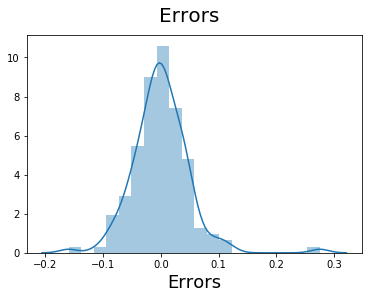

In [1066]:
# Plot the histogram of the error terms for residual Analysis
# normally distributed with a mean value of 0
fig = plt.figure()
sns.distplot((y_train - y_train_price), bins = 20)
fig.suptitle('Errors', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18)       

### Making predictions

In [1067]:
#perform scaling on test data
# Apply scaler() to all the columns except the 'dummy' variables
carnumvars = ['size','enginesize','wheelbase','curbweight','cylindernumber',
           'price','horsepower','boreratio']

df_test[carnumvars] = scaler.transform(df_test[carnumvars])
df_test.head()

,enginesize,cylindernumber,size,wheelbase,horsepower,curbweight,boreratio,price,turbo,dohcv,...,peugeot,plymouth,porsche,renault,saab,subaru,toyota,volkswagen,volvo,rear
160,0.186047,0.333333,0.242105,0.313793,0.091667,0.235066,0.404762,0.072382,0,0,...,0,0,0,0,0,0,1,0,0,0
186,0.255814,0.333333,0.547368,0.368966,0.154167,0.305275,0.404762,0.093295,0,0,...,0,0,0,0,0,0,0,1,0,0
59,0.395349,0.333333,0.600000,0.420690,0.150000,0.347944,0.563492,0.102964,0,0,...,0,0,0,0,0,0,0,0,0,0
165,0.186047,0.333333,0.252632,0.272414,0.266667,0.301396,0.444444,0.115479,0,0,...,0,0,0,0,0,0,1,0,0,0
140,0.232558,0.333333,0.189474,0.231034,0.104167,0.291699,0.746032,0.068652,0,0,...,0,0,0,0,0,1,0,0,0,0


In [1068]:
#Display the statistics of the test dataset
df_test.describe()

,enginesize,cylindernumber,size,wheelbase,horsepower,curbweight,boreratio,price,turbo,dohcv,...,peugeot,plymouth,porsche,renault,saab,subaru,toyota,volkswagen,volvo,rear
count,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.0,...,62.000000,62.000000,62.000000,62.0,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000
mean,0.417854,0.330645,0.514092,0.437764,0.248858,0.428470,0.556580,0.239439,0.177419,0.0,...,0.048387,0.048387,0.032258,0.0,0.048387,0.016129,0.193548,0.080645,0.080645,0.032258
std,0.239839,0.082603,0.279439,0.212861,0.163376,0.179488,0.228484,0.233076,0.385142,0.0,...,0.216335,0.216335,0.178127,0.0,0.216335,0.127000,0.398304,0.274512,0.274512,0.178127
min,0.046512,0.000000,0.010526,0.000000,0.016667,0.128394,-0.111111,0.007763,0.000000,0.0,...,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.232558,0.333333,0.263158,0.313793,0.107292,0.305275,0.404762,0.092342,0.000000,0.0,...,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.372093,0.333333,0.531579,0.387931,0.218750,0.406129,0.563492,0.158991,0.000000,0.0,...,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.593023,0.333333,0.776316,0.570690,0.295833,0.564876,0.746032,0.317243,0.000000,0.0,...,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,0.976744,0.500000,1.010526,1.182759,0.662500,0.935609,0.888889,1.112855,1.000000,0.0,...,1.000000,1.000000,1.000000,0.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [1069]:
df_test.shape

(62, 44)

In [1070]:
#Creating the X and Y variables out of the test dataset
y_test = df_test.pop('price')
X_test = df_test

In [1071]:
type(X_train_lm)

pandas.core.frame.DataFrame

In [1072]:
X_train_lm.drop('const',axis=1,inplace=True)

# Creating the dataframe from X_test
X_test_new = X_test[X_train_lm.columns]

# Adding a constant variable 
X_test_new = sm.add_constant(X_test_new)

In [1073]:
y_pred = lm.predict(X_test_new)

Text(0,0.5,'y_pred')

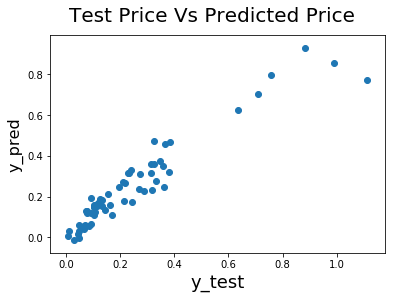

In [1074]:
# Plotting Price in the test dataset and the predicted Price to understand the spread.
fig = plt.figure()
plt.scatter(y_test,y_pred)
fig.suptitle('Test Price Vs Predicted Price', fontsize=20)              # Plot heading 
plt.xlabel('y_test', fontsize=18)                          # X-label
plt.ylabel('y_pred', fontsize=16)                          # Y-label

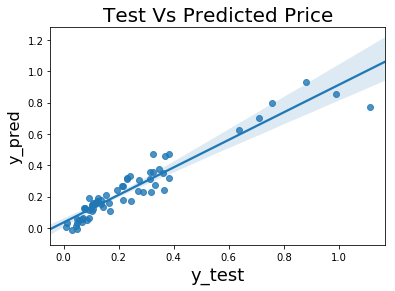

In [1075]:
ax = sns.regplot(y_test, y_pred)
plt.title('Test Vs Predicted Price', fontsize=20)         # Plot heading 
plt.xlabel('y_test', fontsize=18)                          # X-label
plt.ylabel('y_pred', fontsize=16)                          # Y-label
plt.show()

In [1076]:
y_test

160    0.072382
186    0.093295
59     0.102964
165    0.115479
140    0.068652
64     0.169268
198    0.367489
75     0.314529
172    0.346741
104    0.333757
200    0.323977
136    0.360030
111    0.289029
41     0.216233
73     0.990193
31     0.047987
156    0.050280
133    0.194823
65     0.363621
83     0.269387
195    0.229218
197    0.314860
126    0.757245
118    0.012542
167    0.092024
101    0.231539
124    0.211233
69     0.637014
11     0.326187
46     0.163826
         ...   
110    0.241512
201    0.384756
115    0.318037
174    0.154156
134    0.274111
169    0.134569
92     0.047822
173    0.105810
74     1.112855
3      0.243998
157    0.057463
81     0.093406
32     0.007763
99     0.105838
26     0.068818
88     0.114954
184    0.079482
187    0.120922
52     0.046330
168    0.124900
164    0.086195
188    0.134735
7      0.381302
158    0.076802
123    0.105064
28     0.105064
29     0.216758
182    0.073404
40     0.143023
128    0.881565
Name: price, Length: 62,

In [1077]:
y_pred

160    0.061403
186    0.117354
59     0.107276
165    0.160853
140    0.041326
64     0.110131
198    0.457257
75     0.358446
172    0.373232
104    0.274364
200    0.360023
136    0.348506
111    0.226723
41     0.176676
73     0.854293
31    -0.004495
156    0.059591
133    0.244263
65     0.245210
83     0.238188
195    0.313596
197    0.314711
126    0.798685
118    0.029310
167    0.190296
101    0.317075
124    0.270362
69     0.625048
11     0.472245
46     0.157429
         ...   
110    0.332077
201    0.469140
115    0.230865
174    0.211179
134    0.308477
169    0.181557
92     0.031849
173    0.157273
74     0.772131
3      0.174715
157    0.049126
81     0.062913
32     0.006788
99     0.124228
26     0.054596
88     0.154242
184    0.130129
187    0.170929
52     0.015191
168    0.189739
164    0.054209
188    0.151900
7      0.321885
158    0.120115
123    0.148700
28     0.149475
29     0.268610
182    0.129711
40     0.135371
128    0.928476
Length: 62, dtype: float

In [1079]:
from sklearn.metrics import r2_score 
r2_score(y_true = y_test, y_pred = y_pred)

0.907873908363553

In [1080]:
from sklearn.metrics import r2_score 
r2_score(y_true = y_train, y_pred = y_train_price)

0.9485204526641443